C:\Users\DOMINIC\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


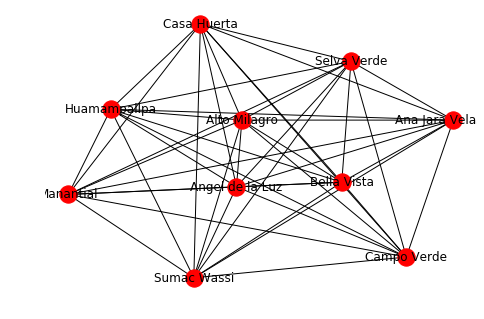

In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()

def readFile(filename):
    dictionary = {}
    with open(filename, encoding='utf-8-sig') as csvfile:
        file = csv.reader(csvfile, delimiter=',')

        idelem = -1

        for row in file:
            if idelem != -1:
                elem = {}
                elem["id"]=row[0]
                elem["name"] = row[5]
                elem["xCord"] = float(row[15])
                elem["yCord"] = float(row[16])
                dictionary[idelem] = elem
                del elem
            idelem += 1

    return dictionary

def calcularDistancia(longitud1, longitud2, latitud1, latitud2):
    return ((longitud1-longitud2)**2 + (latitud1-latitud2)**2)**(0.5)

def makingDictonaries2(filename):
    dictionary = readFile(filename)
    distancia={}
    #100
    for i in dictionary:
        aux = {}
        for j in dictionary:
            aux[j] = calcularDistancia(float(dictionary[i]["xCord"]),float(dictionary[j]["xCord"]),float(dictionary[i]["yCord"]),float(dictionary[j]["yCord"]))
            G.add_weighted_edges_from([(dictionary[j]['name'], dictionary[i]['name'], aux[j])])

makingDictonaries2('test1.csv')

nx.draw(G, with_labels=True)
plt.draw()
plt.show()


0 0 0.0
1 1 0.0
2 2 0.0
3 3 0.0
4 4 0.0
5 5 0.0
6 6 0.0
7 7 0.0
8 8 0.0
9 9 0.0
3 4 0.10056573988137786
4 3 0.10056573988137786
1 2 0.19235354339982622
2 1 0.19235354339982622
6 9 1.442426178889728
9 6 1.442426178889728
0 5 1.5395538839986203
5 0 1.5395538839986203
4 7 2.2402977506232107
7 4 2.2402977506232107
3 7 2.330026840243892
7 3 2.330026840243892
8 9 2.7652766387506325
9 8 2.7652766387506325
1 5 2.8282140247580214
5 1 2.8282140247580214
2 5 2.981484223298616
5 2 2.981484223298616
0 1 2.9845302788560355
1 0 2.9845302788560355
2 7 3.0669491299972838
7 2 3.0669491299972838
1 7 3.0679364350958758
7 1 3.0679364350958758
0 3 3.159015391400545
3 0 3.159015391400545
0 2 3.175224693816546
2 0 3.175224693816546
0 4 3.2372824007700833
4 0 3.2372824007700833
1 4 3.43606967093071
4 1 3.43606967093071
1 3 3.439936649354556
3 1 3.439936649354556
2 4 3.5569594850783597
4 2 3.5569594850783597
2 3 3.565068886122528
3 2 3.565068886122528
6 8 4.036858385351165
8 6 4.036858385351165
3 5 4.4134352316

C:\Users\DOMINIC\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


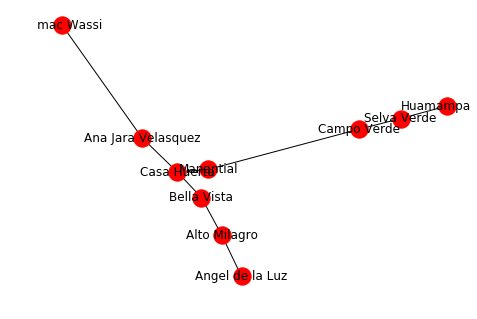

In [5]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()

class Graph:

    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    #encontramos los padres 
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    #Unimos los subconjuntos por rango
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)

        #agregamos el arbol con menor rango al que tiene mayor rango
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        #Si los rangos son iguales agrega un arbol a otro e incrementale el rango en 1
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
        
    def KrustalMST(self, dictionary):
        result = [] # aqui se guarda el arbol de expansion minima

        i = 0
        e = 0

        #ordenamos las aristas de menor a mayor
        #creamos una copia del grafo (inmutable data)
        self.graph = sorted(self.graph, key=lambda item: item[2])

        parent = []
        rank = []

        #creamos N subconjuntos con elementos unicos
        for node in range(self.V):
            parent.append(node)
            rank.append(0)

        #vamos a guardar en los resultados n-1 aristas
        while e < self.V - 1:
            #elegimos la arista menor e incrementamos el indice para la siguiente itericion
            u, v, w = self.graph[i]
            
            print(u, v, w)
            i += 1
            x = self.find(parent, u)
            y = self.find(parent, v)

            #si al incluir la arista no se genera un ciclo, inclumos esta en el arreglo de resultado e incrementamos el indice en 1
            if x != y:
                e += 1
                result.append([dictionary[u]['name'], dictionary[v]['name'], w])
                G.add_weighted_edges_from([(dictionary[u]['name'], dictionary[v]['name'], w)])
                self.union(parent, rank, x, y)

        return result, G

    
def readFile(filename):
    dictionary = {}
    with open(filename, encoding='utf-8-sig') as csvfile:
        file = csv.reader(csvfile, delimiter=',')

        idelem = -1

        for row in file:
            if idelem != -1:
                elem = {}
                elem["id"]=row[0]
                elem["name"] = row[5]
                elem["xCord"] = float(row[15])
                elem["yCord"] = float(row[16])
                dictionary[idelem] = elem
                del elem
            idelem += 1
            
        g = Graph(idelem)
        
    return dictionary, g

def calcularDistancia(longitud1, longitud2, latitud1, latitud2):
    return ((longitud1-longitud2)**2 + (latitud1-latitud2)**2)**(0.5)

def makingDictonaries2(filename):
    dictionary, graph = readFile(filename)
    distancia={}
    #100
    for i in dictionary:
        aux = {}
        for j in dictionary:
            aux[j] = calcularDistancia(float(dictionary[i]["xCord"]),float(dictionary[j]["xCord"]),float(dictionary[i]["yCord"]),float(dictionary[j]["yCord"]))
            graph.addEdge(i, j, aux[j])
    
    return graph.KrustalMST(dictionary)

makingDictonaries2('test1.csv')

nx.draw(G, with_labels=True)
plt.draw()
plt.show()